<a href="https://colab.research.google.com/github/ninja03jod/Data_Science_Projects/blob/main/CaseStudy_CarMakers_Brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/cars.csv")
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [4]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [5]:
# here is a space at prefix in features name
# lets change it
# This approach is temporary
#df.columns.str.lstrip(" ")
# for making it permanant
df.columns = df.columns.str.lstrip(" ")

In [6]:
# we have an object dtype of features cubicinches and weightlabel
# we have to change them
# We use to_numeric
# if the data is in str we can convert it to number
# but if empty str is avail then use errors key
# errors = coerce is used to fill the empty str with nan values
# lets see
df['cubicinches'] = pd.to_numeric(df['cubicinches'],errors="coerce")

In [7]:
# lets check nan
df.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [8]:
df['weightlbs'] = pd.to_numeric(df['weightlbs'],errors="coerce")
df.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [9]:
# lets fill nan
# i'll take mode of cubicinches and mean of weightlbs
df.cubicinches.mode()

0    97.0
Name: cubicinches, dtype: float64

In [10]:
df.weightlbs.mean()

3009.8333333333335

In [11]:
df.cubicinches = df.cubicinches.fillna(97)
df.weightlbs = df.weightlbs.fillna(3009)

In [12]:
df.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [13]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [14]:
# fetch the sum of weight of brand
df.groupby("brand")[["weightlbs"]].sum()

,weightlbs
brand,
Europe.,117606.0
Japan.,113681.0
US.,554277.0


In [18]:
# show thw record of europe only
df.query("brand==' Europe.'")

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
8,25.4,5,183.0,77,3530.0,20,1980,Europe.
11,34.3,4,97.0,78,2188.0,16,1981,Europe.
19,24.0,4,107.0,90,2430.0,15,1971,Europe.
21,21.5,4,121.0,110,2600.0,13,1978,Europe.
36,26.0,4,97.0,46,1835.0,21,1971,Europe.
48,29.0,4,97.0,78,1940.0,15,1978,Europe.
51,27.2,4,141.0,71,3190.0,25,1980,Europe.
53,24.0,4,116.0,75,2158.0,16,1974,Europe.
58,29.0,4,90.0,70,1937.0,14,1977,Europe.


In [16]:
# how many cars from Europe brand
df[df.brand == " Europe."].shape[0]

48

In [37]:
# remove the space and dot of Europe, US and Japan
df.brand = df.brand.str.replace(" ","")
df.brand = df.brand.str.replace(".","")
df.brand = df.brand.str.lower()

<ipython-input-37-66f8e33147a9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.brand = df.brand.str.replace(".","")


In [38]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,us
1,31.9,4,89.0,71,1925.0,14,1980,europe
2,17.0,8,302.0,140,3449.0,11,1971,us
3,15.0,8,400.0,150,3761.0,10,1971,us
4,30.5,4,98.0,63,2051.0,17,1978,us
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,us
257,36.1,4,91.0,60,1800.0,16,1979,japan
258,22.0,6,232.0,112,2835.0,15,1983,us
259,18.0,6,232.0,100,3288.0,16,1972,us


In [39]:
# dispaly how many cars have of each brand
df.groupby("brand").count()[["mpg"]]
# this count approach will gies output in ascending order
# output will get in dataframe

,mpg
brand,
europe,48
japan,51
us,162


In [40]:
# we have another approach
df.brand.value_counts()
# this value_counts() give output in descending order
# output will get in series

us        162
japan      51
europe     48
Name: brand, dtype: int64

<Axes: ylabel='brand'>

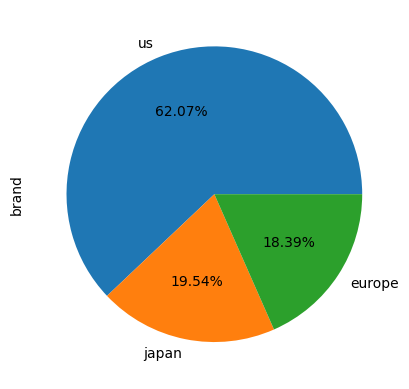

In [43]:
# % plot of brand
df.brand.value_counts().plot.pie(autopct="%.2f%%")

<Axes: >

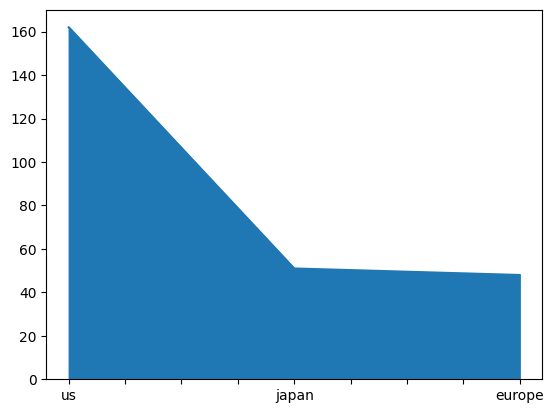

In [44]:
df.brand.value_counts().plot(kind="area")

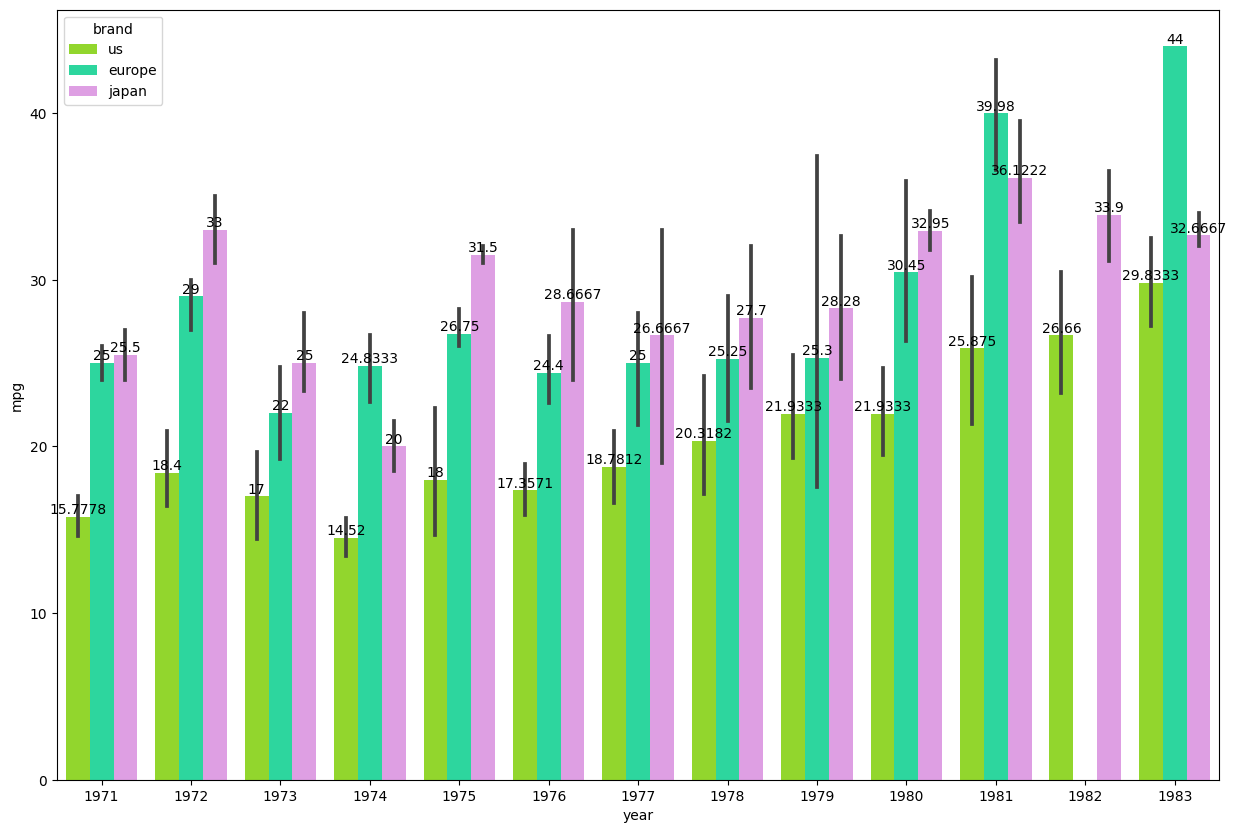

In [48]:
# year wise mpg
plt.figure(figsize=(15,10))
bar = sns.barplot(data=df,x="year",y="mpg",hue="brand",palette=["#97F211","#11F2A7","#E793EF"])

for i in bar.containers:
  plt.bar_label(i)

In [49]:
df.tail()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,17.0,8,305.0,130,3840.0,15,1980,us
257,36.1,4,91.0,60,1800.0,16,1979,japan
258,22.0,6,232.0,112,2835.0,15,1983,us
259,18.0,6,232.0,100,3288.0,16,1972,us
260,22.0,6,250.0,105,3353.0,15,1977,us


<Axes: xlabel='cubicinches', ylabel='Density'>

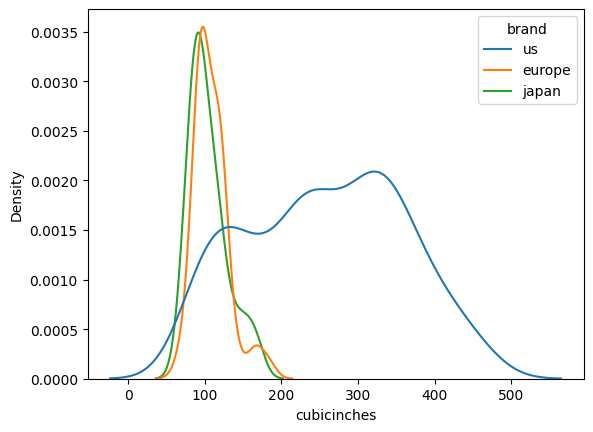

In [50]:
sns.kdeplot(data=df,x="cubicinches",hue="brand")

<Axes: xlabel='year', ylabel='hp'>

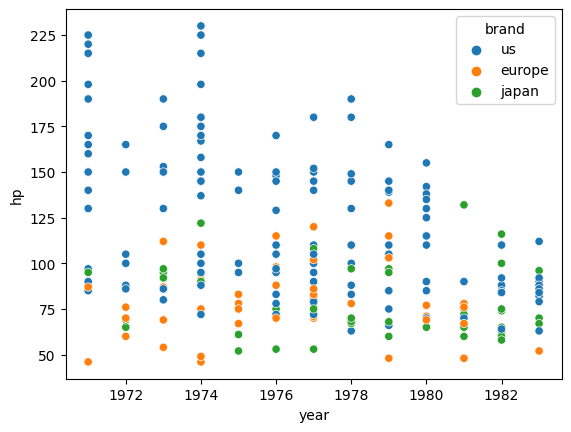

In [53]:
sns.scatterplot(data=df,x="year",y="hp",hue="brand")

<Axes: xlabel='year', ylabel='weightlbs'>

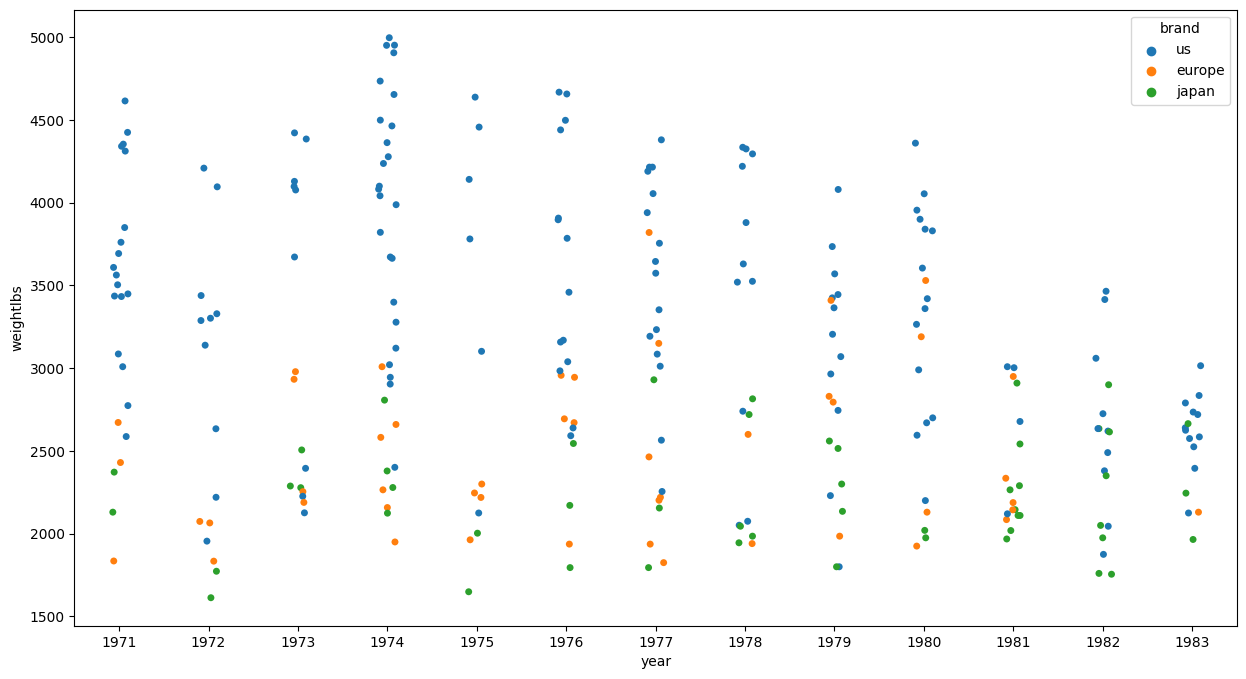

In [55]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df,x="year",y="weightlbs",hue="brand")

<Axes: xlabel='year', ylabel='count'>

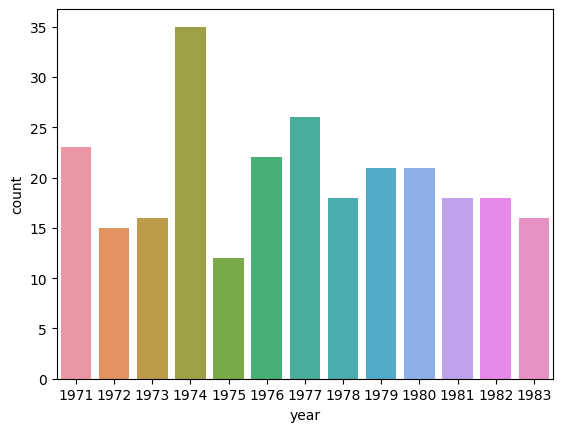

In [56]:
sns.countplot(data=df,x="year")

In [57]:
df.sample()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
145,23.0,4,120.0,88,2957.0,17,1976,europe


In [60]:
# lets fetch first record of each brand
df.groupby("brand").first()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
brand,,,,,,,
europe,31.9,4,89.0,71,1925.0,14,1980
japan,37.7,4,89.0,62,2050.0,17,1982
us,14.0,8,350.0,165,4209.0,12,1972


In [62]:
df.groupby("brand").last()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
brand,,,,,,,
europe,36.4,5,121.0,67,2950.0,20,1981
japan,36.1,4,91.0,60,1800.0,16,1979
us,22.0,6,250.0,105,3353.0,15,1977


In [61]:
# fetch the last record of specific year
df.groupby("year").last()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,brand
year,,,,,,,
1971,24.0,4,113.0,95,2372.0,15,japan
1972,18.0,6,232.0,100,3288.0,16,us
1973,13.0,8,307.0,130,4098.0,14,us
1974,13.0,8,350.0,145,3988.0,13,us
1975,31.0,4,76.0,52,1649.0,17,japan
1976,16.0,8,318.0,150,4498.0,15,us
1977,22.0,6,250.0,105,3353.0,15,us
1978,16.0,8,400.0,180,4220.0,11,us
1979,36.1,4,91.0,60,1800.0,16,japan


In [64]:
df.rename(columns={"time-to-60":"time_to_60"},inplace=True)

In [65]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time_to_60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,us
1,31.9,4,89.0,71,1925.0,14,1980,europe
2,17.0,8,302.0,140,3449.0,11,1971,us
3,15.0,8,400.0,150,3761.0,10,1971,us
4,30.5,4,98.0,63,2051.0,17,1978,us
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,us
257,36.1,4,91.0,60,1800.0,16,1979,japan
258,22.0,6,232.0,112,2835.0,15,1983,us
259,18.0,6,232.0,100,3288.0,16,1972,us
